#### create 1000 point ABCD method example 

In [159]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import matplotlib.mlab as mlab

In [160]:
N = 1000 #number of total events
tests = 3 #number of N event tests (loops)
xs = .5 #separation of left and right regions
ys = .5 #separation of top and bottom regions

$$ N_{A}= \frac {N_{B}N_{C}}{N_{D}} $$

$$ N_{B} = \int_{}^{}\int_{}^{} f(x,y) dxdy \quad;\quad f(x,y)=f1(x)f2(y) $$

In [38]:
def ABCD(N,tests,xs,ys):
    NA = np.zeros(tests)
    A = np.zeros(tests)
    for i in range(tests):
        xvals = np.random.random_sample(N)
        yvals = np.random.random_sample(N)
            
        right = np.where(xvals>xs) 
        left = np.where(xvals<xs)

        A[i] = np.size(np.where(yvals[right]>ys))
        B = np.size(np.where(yvals[right]<ys))
        C = np.size(np.where(yvals[left]>ys))
        D = np.size(np.where(yvals[left]<ys))
        NA[i] = (B*C/D)
        if tests<4:
            print("Test " +str(i+1)+ ":")
            print("ABCD Method estimated events in A:" + str(NA[i]))
            print("Actual events in region A:" + str(A[i]))
            print("Actual events in region B:" + str(B))
            print("Actual events in region C:" + str(C))
            print("Actual events in region D:" + str(D) + "\n")
        
    #Visual of ABCD plot
    plt.figure(figsize=(8,6))
    plt.plot(xvals,yvals, ".")
    plt.title("Visual of ABCD events for final test values")
    plt.axvline(x=xs, color='r', linestyle='--')
    plt.axhline(y=ys, color='r', linestyle='--');
    plt.text(.8,.8, "A", color='r',fontsize=40)
    plt.text(.8,.2, "B", color='r',fontsize=40)
    plt.text(.2,.8, "C", color='r',fontsize=40)
    plt.text(.2,.2, "D", color='r',fontsize=40);
    return NA, A


In [134]:
#what the results look like for 3 tests of 1000 events (uncomment below)

#NA, A = ABCD(N,tests,xs,ys)

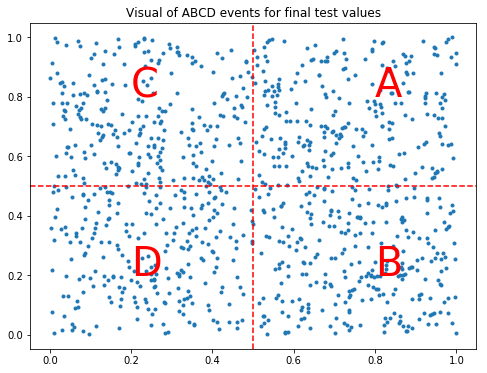

In [137]:
#NA_10, A_10 = ABCD(10,1000,xs,ys)
#NA_100, A_100 = ABCD(100,1000,xs,ys)
#NA_500, A_500 = ABCD(500,1000,xs,ys)
NA_1000, A_1000 = ABCD(1000,1000,xs,ys)
#NA_2000, A_2000 = ABCD(2000,1000,xs,ys)

In [146]:
def gaussian(x,a,b,sigma):
    '''
    input: 
    x= points to plot
    a = amplitude
    b = mean of data
    sigma = standard deviation (rms) of data 
    '''
    return a*np.exp((1/2)*((x-b)/(sigma))**2)

x = np.linspace(np.amin(n),np.amax(n), 1000)
a = np.amax(n)
b = np.mean(n)
sigma = np.std(n)
y = gaussian(x,a,b,sigma)
init_guess = [100, 50, 30]

popt,pcov = curve_fit(gaussian,x,y,p0=init_guess)


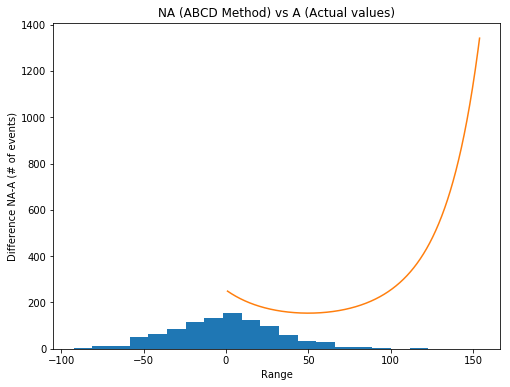

In [157]:
#1000 events & 1000 tests

dif_1000 = NA_1000-A_1000

plt.figure(figsize=(8,6))
plt.title("NA (ABCD Method) vs A (Actual values)");
plt.ylabel("Difference NA-A (# of events)")
plt.xlabel("Range");

n, bins, patches = plt.hist(dif_1000, bins=20)

plt.plot(x,gaussian(x,*popt))

#y_hist = mlab.normpdf(bins,b, sigma)    I was trying something else here but couldn't figure it out
#plt.plot(bins,y_hist);

In [147]:
bins

array([-92.37269373, -81.0395216 , -69.70634946, -58.37317733,
       -47.0400052 , -35.70683307, -24.37366094, -13.04048881,
        -1.70731668,   9.62585545,  20.95902759,  32.29219972,
        43.62537185,  54.95854398,  66.29171611,  77.62488824,
        88.95806037, 100.2912325 , 111.62440464, 122.95757677,
       134.2907489 ])

In [149]:
n

array([  2.,  12.,  14.,  49.,  64.,  86., 116., 133., 154., 125.,  97.,
        61.,  34.,  28.,   9.,   9.,   2.,   1.,   3.,   1.])